<a href="https://colab.research.google.com/github/Thujaina/NIT-Internship/blob/main/negative_log_likelihood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install imblearn

In [2]:
!pip install seaborn

In [3]:
!pip install -U tensorflow scikeras imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 5.7 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is inco

In [4]:
!pip install scikeras

In [5]:
!pip install -U scikit-learn scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 39.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")


In [7]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [8]:
TRAIN_PATH = "/content/drive/MyDrive/datasets/ECG/mitbih_train.csv"
TEST_PATH  = "/content/drive/MyDrive/datasets/ECG/mitbih_test.csv"

train = pd.read_csv(TRAIN_PATH, header=None)
test  = pd.read_csv(TEST_PATH, header=None)

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (87554, 188)
Test shape: (21892, 188)


In [9]:
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]


In [10]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)


In [11]:
y_res_nll  = y_res.values
y_test_nll = y_test.values


In [12]:
X_train, X_val, y_train, y_val = train_test_split(
    X_res, y_res_nll, test_size=0.2, random_state=0
)


In [13]:
nll_loss = tf.keras.losses.SparseCategoricalCrossentropy()


In [14]:
def ann_model():
    model = Sequential([
        Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
        Dense(64, activation="relu"),
        Dense(5, activation="softmax")  # NLL requires softmax
    ])

    model.compile(
        optimizer="adam",
        loss=nll_loss,
        metrics=["accuracy"]
    )

    return model


In [15]:
model = ann_model()

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64
)


Epoch 1/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8456 - loss: 0.4241 - val_accuracy: 0.9478 - val_loss: 0.1514
Epoch 2/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9517 - loss: 0.1394 - val_accuracy: 0.9681 - val_loss: 0.0935
Epoch 3/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9663 - loss: 0.0988 - val_accuracy: 0.9716 - val_loss: 0.0881
Epoch 4/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9744 - loss: 0.0758 - val_accuracy: 0.9733 - val_loss: 0.0755
Epoch 5/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.9800 - loss: 0.0608 - val_accuracy: 0.9828 - val_loss: 0.0529
Epoch 6/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9836 - loss: 0.0500 - val_accuracy: 0.9811 - val_loss: 0.0565
Epoch 7/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9851 - loss: 0.0450 - val_accuracy: 0.9876 - val_loss: 0.0385
Epoch 8/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9859 - loss: 0

In [16]:
y_val_pred = model.predict(X_val).argmax(axis=1)

mcc = matthews_corrcoef(
    y_val,
    y_val_pred
)

print("Validation MCC:", mcc)


2265/2265 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step
Validation MCC: 0.9858565097171765


In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test_nll)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


685/685 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9677 - loss: 0.1105
Test Accuracy: 0.9622693061828613
Test Loss: 0.16118642687797546


In [18]:
test_predictions = model.predict(X_test).argmax(axis=1)

print(
    classification_report(
        y_test_nll,
        test_predictions
    )
)


685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     18118
         1.0       0.53      0.80      0.64       556
         2.0       0.89      0.95      0.92      1448
         3.0       0.62      0.85      0.72       162
         4.0       0.98      0.98      0.98      1608

    accuracy                           0.96     21892
   macro avg       0.80      0.91      0.85     21892
weighted avg       0.97      0.96      0.96     21892



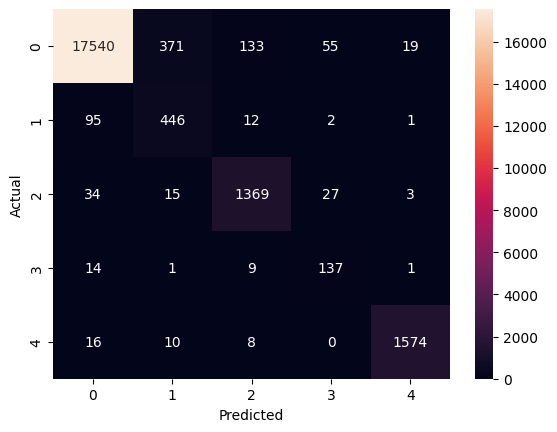

In [19]:
cm = confusion_matrix(
    y_test_nll,
    test_predictions
)

sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [20]:
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

acc_scores = []
mcc_scores = []
fold = 1

for train_idx, val_idx in kfold.split(X_res):
    print(f"\n🔁 Fold {fold}")

    X_tr, X_va = X_res.iloc[train_idx], X_res.iloc[val_idx]
    y_tr, y_va = y_res_nll[train_idx], y_res_nll[val_idx]

    model = ann_model()
    model.fit(X_tr, y_tr, epochs=10, batch_size=64, verbose=0)

    val_pred = model.predict(X_va).argmax(axis=1)

    acc = np.mean(val_pred == y_va)
    mcc = matthews_corrcoef(y_va, val_pred)

    acc_scores.append(acc)
    mcc_scores.append(mcc)

    print(f"Accuracy: {acc:.4f}")
    print(f"MCC: {mcc:.4f}")

    fold += 1

print("\n✅ Cross-Validation Results")
print("Accuracy per fold:", acc_scores)
print("Mean Accuracy:", np.mean(acc_scores))
print("MCC per fold:", mcc_scores)
print("Mean MCC:", np.mean(mcc_scores))



🔁 Fold 1
2831/2831 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Accuracy: 0.9809
MCC: 0.9761

🔁 Fold 2
2831/2831 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Accuracy: 0.9864
MCC: 0.9831

🔁 Fold 3
2831/2831 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Accuracy: 0.9768
MCC: 0.9711

🔁 Fold 4
2831/2831 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Accuracy: 0.9888
MCC: 0.9860

✅ Cross-Validation Results
Accuracy per fold: [np.float64(0.9808696420095155), np.float64(0.9864221925399331), np.float64(0.9767852609036417), np.float64(0.9887623084735285)]
Mean Accuracy: 0.9832098509816547
MCC per fold: [0.9761485826235811, 0.9830945764324899, 0.9710805947347338, 0.9859534563735077]
Mean MCC: 0.979069302541078
